In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import time
import datetime

#%matplotlib notebook

In [3]:
inside_class_interractions = {}
outside_class_interractions = {}

with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600))) #.strftime("%A, %B %d, %Y %H:%M:%S") #time.strftime("%a %H:%M:%S", time.gmtime(int(t) + 3600))
        #datetime datetime objects
        
        #outside class interractions
        if cls1 != cls2:
            if ts in outside_class_interractions:
                outside_class_interractions[ts] += 1
            else:
                outside_class_interractions[ts] = 1
                
        #inside class interractions
        elif cls1 == cls2:
            if ts in inside_class_interractions:
                inside_class_interractions[ts] += 1
            else:
                inside_class_interractions[ts] = 1

In [8]:
print(outside_class_interractions.keys())

dict_keys([datetime.datetime(2013, 12, 2, 12, 6, 20), datetime.datetime(2013, 12, 2, 12, 6, 40), datetime.datetime(2013, 12, 2, 12, 7), datetime.datetime(2013, 12, 2, 12, 8, 20), datetime.datetime(2013, 12, 2, 12, 8, 40), datetime.datetime(2013, 12, 2, 12, 9), datetime.datetime(2013, 12, 2, 12, 9, 20), datetime.datetime(2013, 12, 2, 12, 9, 40), datetime.datetime(2013, 12, 2, 12, 10), datetime.datetime(2013, 12, 2, 12, 10, 20), datetime.datetime(2013, 12, 2, 12, 10, 40), datetime.datetime(2013, 12, 2, 12, 11), datetime.datetime(2013, 12, 2, 12, 11, 20), datetime.datetime(2013, 12, 2, 12, 11, 40), datetime.datetime(2013, 12, 2, 12, 12), datetime.datetime(2013, 12, 2, 12, 12, 20), datetime.datetime(2013, 12, 2, 12, 12, 40), datetime.datetime(2013, 12, 2, 12, 13), datetime.datetime(2013, 12, 2, 12, 13, 20), datetime.datetime(2013, 12, 2, 12, 13, 40), datetime.datetime(2013, 12, 2, 12, 14), datetime.datetime(2013, 12, 2, 12, 14, 20), datetime.datetime(2013, 12, 2, 12, 14, 40), datetime.date

^^ making dictionaries of inside and outside class interractions

<BarContainer object of 3237 artists>

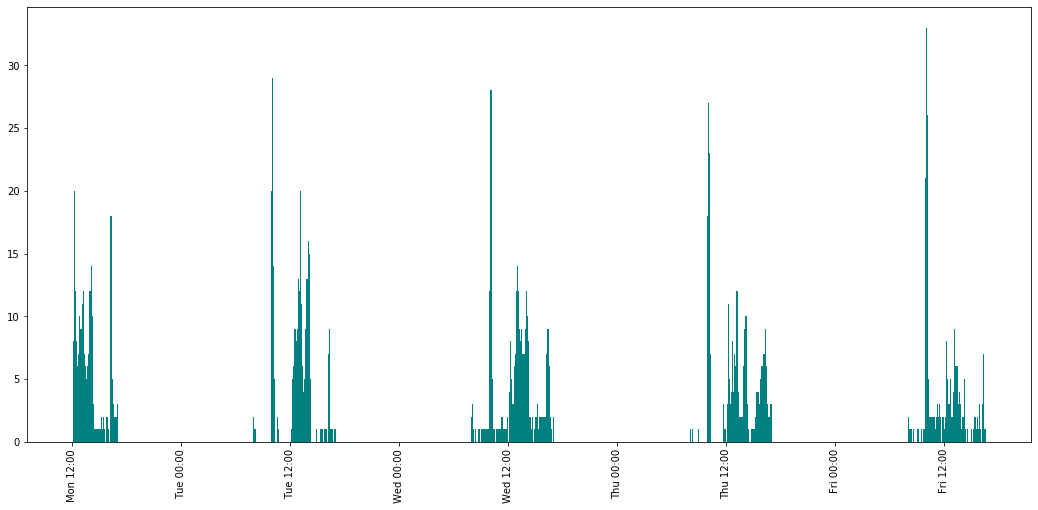

In [5]:
#benchmarks
xb = []
yb = []
for day in range(2,7):
    for hour in range(8,18):
        xb.append(datetime.datetime.fromisoformat(("2013-12-%02dT%02d:00:00" % (day, hour))))
        yb.append(25)

xo = list(outside_class_interractions.keys())
yo = list(outside_class_interractions.values())
# x1 = []

# i = 0
# for xn in x:
#     if i % 90 == 0:
#         x1.append(xn)
#     else:
#         x1.append(" ")
#     i += 1

figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
# plt.bar(xb, yb, width=0.005, color="orange")
plt.bar(xo,yo, width=0.005, color="teal")

^^ I plot of **when** people are in contact with people **not** in their class.  Make an x-y graph, x is time, y is count of interractions.

<BarContainer object of 50 artists>

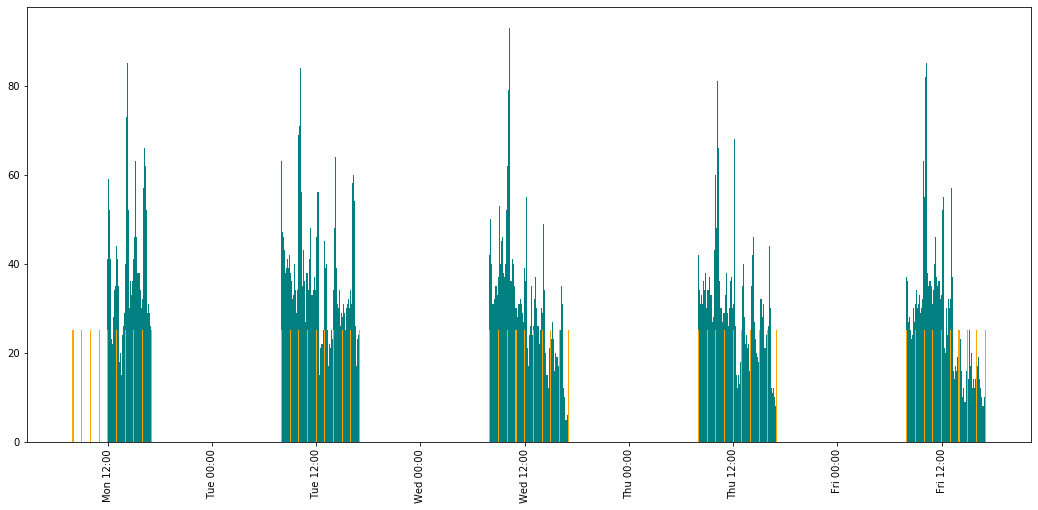

In [19]:
xi = list(inside_class_interractions.keys())
yi = list(inside_class_interractions.values())

figure, axes = plt.subplots(figsize=(18,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(xi,yi, width=0.005, color="teal")
plt.bar(xb, yb, width=0.005, color="orange")

^^ I plot of **when** people are in contact with people **are** in their class.  Make an x-y graph, x is time, y is count of interractions.

In [ ]:
timestamp_frequency = {}
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    i = 0
    for t, id1, id2, cls1, cls2 in reader:
        if t in timestamp_frequency:
            timestamp_frequency[t] += 1
        else:
            timestamp_frequency[t] = 1

^^ When in general there is more contact and when there isn't